In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [28]:
#создаем функцию, которая создает К центроидов из созданной выборки
def initialize_random_centroids(K, X):
    m, n = np.shape(X) #создаем матрицу Х состоящую из m строк и n столбцов, то есть m наблюдений с n координатами
    centroids = np.empty((K, n)) #создаем массив, который хранит информацию о К центроидах 
    for i in range(K):
        centroids[i] =  X[np.random.choice(range(m))] #достаем информацию о i центройде, который выбирается как рандомный из  матрицы X
    return centroids

In [44]:
#ищем ближайщий центроид к заданной точке
def closest_centroid(x, centroids, K):
    distances = np.empty(K) #массив, в котором хранится информация о центроидах
    for i in range(K):
        distances[i] = np.linalg.norm(centroids[i] - x)#считаем расстояние от точки до цетроида
    return np.argmin(distances) # возвращаем минимальное расстояние 

In [45]:
#создаем кластеры
def create_clusters(centroids, K, X):
    m, _ = np.shape(X) #информация о числе строк в массиве
    cluster_idx = np.empty(m) #массив из т строк, в который мы запихнем информацию о центроидах для каждого наблюдения
    for i in range(m):
        cluster_idx[i] = closest_centroid(X[i], centroids, K)#определяем ближайщий цетроид для каждого наблюдения
    return cluster_idx

In [46]:
#создаем функцию для вычисления новых центроидов для кластеров
def compute_means(cluster_idx, K, X):
    _, n = np.shape(X) #находим число столбцов (координат)
    centroids = np.empty((K, n))#создаем массив, в который запишем новые цетроиды
    for i in range(K):
        points = X[cluster_idx == i] # выбираем наблюдения, которые относятся к определенному кластеру
        centroids[i] = np.mean(points, axis=0) # вычисляем среднее значение для каждого набора точек, чтобы получить новый центроид кластера
    return centroids #получаем новые центроиды для каждого кластера

In [47]:
def run_Kmeans(K, X, max_iterations=500):
    # формируем рандомные цетроиды из наших данных
    centroids = initialize_random_centroids(K, X)
    # выводим информацию о начальных цетроидах
    print(f"Начальные координаты центров точек, выбранных в качестве цетроидов: {centroids}")
    for _ in range(max_iterations):
        # создаем кластеры 
        clusters = create_clusters(centroids, K, X)
        previous_centroids = centroids                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
        # вычисляем новые цетры кластеров
        centroids = compute_means(clusters, K, X)
        # вычисляем разницу между предыдущими и новыми центрами кластеров, если разницы нет, возвращаем кластеры
        diff = previous_centroids - centroids
        if not diff.any():
            return clusters
    return clusters

In [48]:
from sklearn.cluster import KMeans
# генерируем синтетический набор данных в виде кластеров, где каждый кластер представляет собой гауссиан (нормальное) распределение точек
X, y = datasets.make_blobs()
y_preds = run_Kmeans(3, X)

Начальные координаты центров точек, выбранных в качестве цетроидов: [[2.12186355 6.81073302]
 [0.17258514 8.13293433]
 [5.4703518  6.42932583]]


In [49]:
X[:,0]

array([ 0.3543024 ,  7.4496532 ,  2.44933081,  5.25117642,  4.47386307,
        1.08341087,  6.3421508 ,  8.04906492,  0.45078701, -0.30824555,
        6.32376425,  7.50144487,  8.32448744,  6.11064246,  1.95504866,
        5.80542987,  2.07906238, -0.21933012,  6.02166166,  4.84325212,
        5.25729603,  8.2937794 ,  4.3345861 ,  1.46129222, -0.18720418,
        0.17258514,  2.09984543,  5.94733624,  8.67688826,  7.07153039,
        7.45472341,  1.92721007,  6.88717377,  5.65071362,  5.88157899,
        7.29933526,  0.68399286,  5.63503543,  8.3757108 ,  5.4703518 ,
        6.1707787 ,  2.11165328,  7.67745276,  1.26045636,  6.22880692,
        3.63563029,  7.0865906 ,  6.20783522,  5.35532914,  5.74064905,
        4.19428409,  0.9724398 ,  6.22614808,  6.71101634,  6.19419193,
        6.86978004,  6.50210273,  5.52171909,  1.9895561 ,  1.42018896,
        6.13983972, -0.61686118,  2.43720592,  8.46727488,  2.12186355,
        7.00941531,  5.31746206,  1.35018728,  4.82642583,  5.54

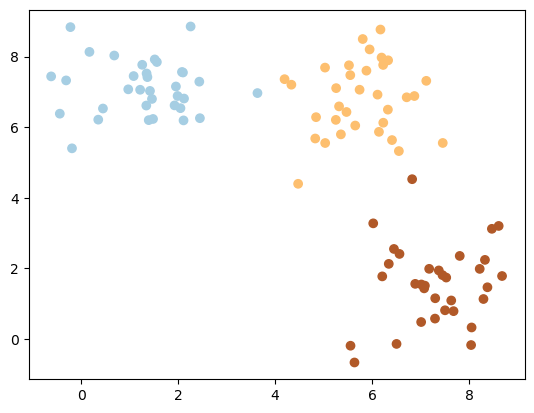

In [50]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'Paired')

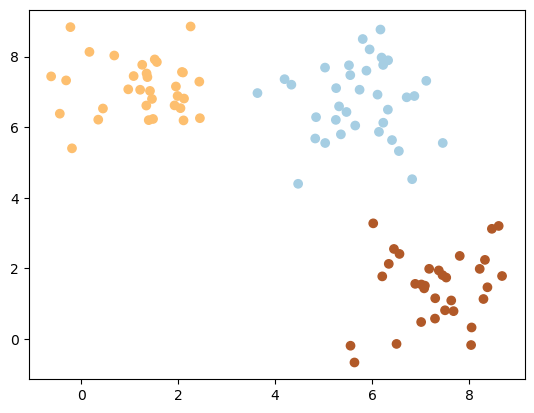

In [51]:
plt.scatter(X[:,0], X[:,1], c = y_preds, cmap = 'Paired')